In [5]:
# Cet environnement Python 3 est livré avec de nombreuses bibliothèques analytiques utiles installées
# Il est défini par l'image Docker kaggle/python : https://github.com/kaggle/docker-python
# Par exemple, voici plusieurs paquets utiles à charger

import numpy as np # algebre linéaire
import pandas as pd # traitement des données

# Visualisation des données
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor


# Les fichiers de données d'entrée sont disponibles dans le répertoire en lecture seule "../input/".
# Par exemple, l'exécution de cette commande (en cliquant sur run ou en appuyant sur Shift+Enter) listera tous les fichiers dans le répertoire input.

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/flights-air-paradise/flights.csv
/kaggle/input/flight-data-n/flight_data_nettoye.csv


In [4]:
fli='/kaggle/input/flight-data-n/flight_data_nettoye.csv'
fli_d = pd.read_csv(fli)
fli_d.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,PRICE
0,2015,1,1,4,1.0,98,N407AS,323.0,584.0,5,...,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0,445.412256
1,2015,1,1,4,0.0,2336,N3KUAA,482.0,542.0,10,...,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0,724.317235
2,2015,1,1,4,11.0,840,N171US,584.0,373.0,20,...,266.0,2296,800.0,11.0,806,811.0,5.0,0,0,804.821875
3,2015,1,1,4,0.0,258,N3HYAA,482.0,510.0,20,...,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0,929.493438
4,2015,1,1,4,1.0,135,N527AS,583.0,324.0,25,...,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0,513.381660


In [3]:
# Chemin du fichier à lire
flight_file_path = "../input/flights-air-paradise/flights.csv"
flight_data = pd.read_csv(flight_file_path)

# Affichage de forme du contenu dataframe
print(f'(axis 0, axis 1) : {flight_data.shape}')

# Affichage des prémieres lignes
flight_data.head()

<ipython-input-3-11bd469186f4>:3: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  flight_data = pd.read_csv(flight_file_path)


(axis 0, axis 1) : (5819079, 31)


/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pan

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Infomations général sur notre dataset (type des colnnes et valeurs manquantes)
flight_data.info()

# Génération des statistiques descriptives pour les colonnes numériques du DataFrame.
flight_data.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             int64  
 24

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pan

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
count,5819079.0,5.819079e+06,5.819079e+06,5.819079e+06,5819079,5.819079e+06,5804358,5819079,5819079,5.819079e+06,...,5.726566e+06,5.714008e+06,5.819079e+06,5.819079e+06,89884,1.063439e+06,1.063439e+06,1.063439e+06,1.063439e+06,1.063439e+06
unique,NaN,NaN,NaN,NaN,14,NaN,4897,930,930,NaN,...,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,WN,NaN,N480HA,ATL,ATL,NaN,...,NaN,NaN,NaN,NaN,B,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,1261855,NaN,3768,346836,346904,NaN,...,NaN,NaN,NaN,NaN,48851,NaN,NaN,NaN,NaN,NaN
mean,2015.0,6.524085e+00,1.570459e+01,3.926941e+00,NaN,2.173093e+03,NaN,NaN,NaN,1.329602e+03,...,1.476491e+03,4.407057e+00,2.609863e-03,1.544643e-02,NaN,1.348057e+01,7.615387e-02,1.896955e+01,2.347284e+01,2.915290e+00
std,0.0,3.405137e+00,8.783425e+00,1.988845e+00,NaN,1.757064e+03,NaN,NaN,NaN,4.837518e+02,...,5.263197e+02,3.927130e+01,5.102012e-02,1.233201e-01,NaN,2.800368e+01,2.143460e+00,4.816164e+01,4.319702e+01,2.043334e+01
min,2015.0,1.000000e+00,1.000000e+00,1.000000e+00,NaN,1.000000e+00,NaN,NaN,NaN,1.000000e+00,...,1.000000e+00,-8.700000e+01,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2015.0,4.000000e+00,8.000000e+00,2.000000e+00,NaN,7.300000e+02,NaN,NaN,NaN,9.170000e+02,...,1.059000e+03,-1.300000e+01,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2015.0,7.000000e+00,1.600000e+01,4.000000e+00,NaN,1.690000e+03,NaN,NaN,NaN,1.325000e+03,...,1.512000e+03,-5.000000e+00,0.000000e+00,0.000000e+00,NaN,2.000000e+00,0.000000e+00,2.000000e+00,3.000000e+00,0.000000e+00
75%,2015.0,9.000000e+00,2.300000e+01,6.000000e+00,NaN,3.230000e+03,NaN,NaN,NaN,1.730000e+03,...,1.917000e+03,8.000000e+00,0.000000e+00,0.000000e+00,NaN,1.800000e+01,0.000000e+00,1.900000e+01,2.900000e+01,0.000000e+00


In [5]:
# Détection des valeurs manquantes
flight_data.isnull().sum()

# Evaluation en pourcentage des valeurs manquante dans notre dataset
percent_missing = (flight_data.isnull().sum().sum()/np.product(flight_data.shape)) * 100
print(f"Pourcentage des valeurs manquantes: {percent_missing}%")

Pourcentage des valeurs manquantes: 16.888424683589076%


In [6]:
# Suppression des 6 dernières colonnes
flight_data.drop(flight_data.columns[-6:], axis=1, inplace=True)
print("Suppresion des colonnes avec le plus grand nombre de valeurs manquantes")

# Vérification après suppression
print(f"Après suppression: {flight_data.shape}")

# Révaluation en pourcentage des valeurs manquantes de notre dataset 
# Affichages des differentes colonnes

percent_missing = (flight_data.isnull().sum().sum()/np.product(flight_data.shape)) * 100
print(f"Pourcentage des valeurs manquantes: {percent_missing}%")

print(f"Affichages des colonnes restantes{flight_data.columns}")

Suppresion des colonnes avec le plus grand nombre de valeurs manquantes
Après suppression: (5819079, 25)
Pourcentage des valeurs manquantes: 0.6584402789513598%
Affichages des colonnes restantesIndex(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


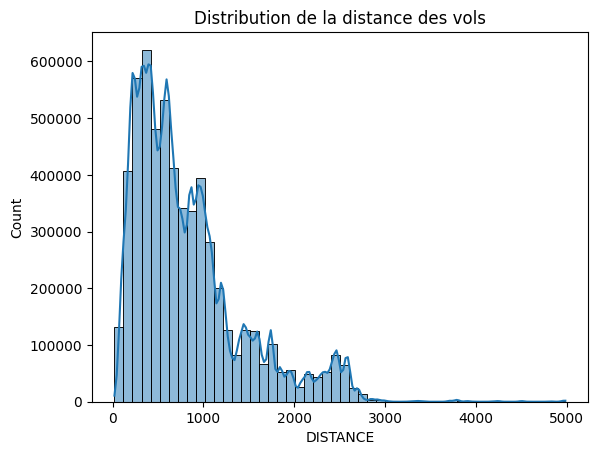

In [14]:
# Visualisation de la colone DISTANCE

sns.histplot(flight_data['DISTANCE'], bins=50, kde=True)
plt.title('Distribution de la distance des vols')
plt.show()

In [7]:
# Vérifier et supprimer les doublons éventuels 
flight_data.drop_duplicates(inplace=True)
print("Shape après suppression des doublons :", flight_data.shape)

Shape après suppression des doublons : (5819079, 25)


In [8]:
# Définir précisément le prix de base par km
# Pour des vols domestiques : entre 0.8€ et 0.15€ par km est très réaliste
base_price_per_km = np.random.uniform(0.8, 0.15, size=len(flight_data))

# Prix initial basé sur la distance
flight_data['PRICE'] = flight_data['DISTANCE'] * base_price_per_km

# Affichage du DF
flight_data.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,PRICE
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0,445.412256
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0,724.317235
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,266.0,2296,800.0,11.0,806,811.0,5.0,0,0,804.821875
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0,929.493438
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0,513.381660


In [9]:
# Conversion en chaînes de caractères pour les colonnes catégorielles
categorical_features = ['AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT']

for col in categorical_features:
    flight_data[col] = flight_data[col].astype(str)

# Vérifier la correction :
flight_data[categorical_features].dtypes

AIRLINE                object
ORIGIN_AIRPORT         object
DESTINATION_AIRPORT    object
dtype: object

In [10]:
from sklearn.preprocessing import OrdinalEncoder

# Encodage des variables catégoriels
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
flight_data[categorical_features] = encoder.fit_transform(flight_data[categorical_features])

# Vérification immédiate :
flight_data[categorical_features].head()

,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT
0,1.0,323.0,584.0
1,0.0,482.0,542.0
2,11.0,584.0,373.0
3,0.0,482.0,510.0
4,1.0,583.0,324.0


In [11]:
import joblib
# Sauvegarde de la variable encoder
joblib.dump(encoder, 'encoder.pkl')

['encoder.pkl']

In [12]:
# Sélection précise de la cible (y : PRICE) et des caractéristiques (X) 
y = flight_data.PRICE

features = ['DISTANCE', 'AIRLINE', 'MONTH','DAY_OF_WEEK', 'SCHEDULED_DEPARTURE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT']
X = flight_data[features]

# Division des données en données de validation et d'entraînement
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=1)


In [14]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error

# Specification du modele(XGBoost)
xgb_model = XGBRegressor(n_estimators=100, random_state=1)

# Entraînement du modele
xgb_model.fit(X_train, y_train)

# Prédiction
predictions = xgb_model.predict(X_val)

# Évaluation rapide MAE
mae = mean_absolute_error(y_val, predictions)
print(f"MAE baseline XGB : {mae:.2f}")

MAE baseline XGB : 133.71


In [15]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error

# Modèle XGB optimisé
xgb_optimized = XGBRegressor(
    n_estimators=1000,        
    learning_rate=0.05,       
    n_jobs=-1,                
    random_state=1
)

# Entraînement avec le paramètre Early Stopping (stop automatiquement quand plus d'amélioration)
xgb_optimized.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    early_stopping_rounds=10,   # s’arrête après 10 tours sans amélioration
    verbose=True
)

# Prédiction et évaluation
optimized_predictions = xgb_optimized.predict(X_val)
optimized_mae = mean_absolute_error(y_val, optimized_predictions)
print(f"MAE XGB optimisé : {optimized_mae:.2f}")


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-rmse:335.40830
[1]	validation_0-rmse:324.30156
[2]	validation_0-rmse:313.93897
[3]	validation_0-rmse:304.27964
[4]	validation_0-rmse:295.29153
[5]	validation_0-rmse:286.93672
[6]	validation_0-rmse:279.18072
[7]	validation_0-rmse:271.98636
[8]	validation_0-rmse:265.32723
[9]	validation_0-rmse:259.16905
[10]	validation_0-rmse:253.48171
[11]	validation_0-rmse:248.23661
[12]	validation_0-rmse:243.40351
[13]	validation_0-rmse:238.95736
[14]	validation_0-rmse:234.86910
[15]	validation_0-rmse:231.11094
[16]	validation_0-rmse:227.66609
[17]	validation_0-rmse:224.50922
[18]	validation_0-rmse:221.62120
[19]	validation_0-rmse:218.98566
[20]	validation_0-rmse:216.56336
[21]	validation_0-rmse:214.35294
[22]	validation_0-rmse:212.33849
[23]	validation_0-rmse:210.50102
[24]	validation_0-rmse:208.83255
[25]	validation_0-rmse:207.31544
[26]	validation_0-rmse:205.93487
[27]	validation_0-rmse:204.67080
[28]	validation_0-rmse:203.53181
[29]	validation_0-rmse:202.48791
[30]	validation_0-rm

In [16]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error
import numpy as np

# Définition du modèle XGB de base
xgb_model = XGBRegressor(random_state=1, n_jobs=-1)

# Grille des hyperparamètres à explorer
param_distributions = {
    'n_estimators': np.arange(100, 501, 100),
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.3, 0.5]
}

# RandomizedSearch avec validation croisée 2-fold
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_distributions,
    n_iter=10,                          # nombre de combinaisons testées 
    scoring='neg_mean_absolute_error',  # MAE comme métrique
    cv=2,                               # 2-fold cross-validation
    verbose=2,
    random_state=1,
    n_jobs=2
)

# Entraînement avec RandomizedSearch
random_search.fit(X_train, y_train)

# Affichage des meilleurs paramètres trouvés
print("Meilleurs paramètres trouvés :", random_search.best_params_)

# Prédiction avec le meilleur modèle
best_model = random_search.best_estimator_
best_predictions = best_model.predict(X_val)

# Évaluation finale MAE
best_mae = mean_absolute_error(y_val, best_predictions)
print(f"MAE après RandomizedSearch XGB : {best_mae:.2f}")


Fitting 2 folds for each of 10 candidates, totalling 20 fits
Meilleurs paramètres trouvés : {'subsample': 0.6, 'n_estimators': 400, 'max_depth': 3, 'learning_rate': 0.2, 'gamma': 0, 'colsample_bytree': 0.6}
MAE après RandomizedSearch XGB : 133.74


In [17]:
final_model = XGBRegressor(
    subsample=0.6,
    n_estimators=400,
    max_depth=3,
    learning_rate=0.2,
    gamma=0,
    colsample_bytree=0.6,
    random_state=1,
    n_jobs=2  
)

final_model.fit(X_train, y_train)

# Sauvegarde du modèle final
joblib.dump(final_model, 'final_xgb_model.pkl')


['final_xgb_model.pkl']

In [13]:
# Sauvegarde du dataset nettoyé
flight_data.to_csv('/kaggle/working/flight_data_nettoye.csv', index=False)
print("✅ Dataset nettoyé sauvegardé dans /kaggle/working/")


✅ Dataset nettoyé sauvegardé dans /kaggle/working/
